In [17]:
using Plots: scatter, scatter!, plot
using Flux
using StaticArrays
using Random: randperm

In [27]:
n = 100
dx = rand(n)
dy = sin.(4*pi*dx) + 0.01*randn(n);

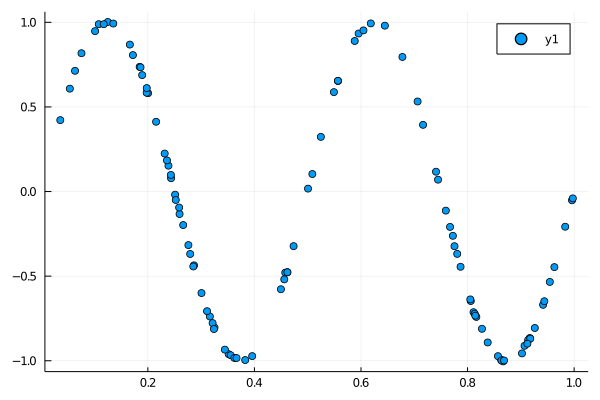

In [28]:
scatter(dx, dy)

In [29]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(Dense(1, 50, σ), Dense(50, 50, σ), Dense(50, 1))

In [30]:
# loss(x, y) = Flux.mse(m(x), y)
loss(x, y) = sum((m(x)-y).^2)

loss (generic function with 1 method)

In [31]:
ps = Flux.params(m)

Params([Float32[-0.2042903; 0.2789504; … ; 0.24610151; 0.0053748684], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.22780722 -0.12517649 … -0.21947291 0.099005766; 0.0061082714 -0.008108602 … -0.18212621 -0.23627558; … ; -0.11668438 0.025758425 … -0.02511088 0.053137224; 0.16852757 -0.17881206 … -0.11347855 0.13615039], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.33711937 -0.087203205 … 0.31299534 0.13696118], Float32[0.0]])

In [32]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Array{Tuple{SArray{Tuple{1},Float64,1,1},SArray{Tuple{1},Float64,1,1}},1}:
 ([0.4617982443630584], [-0.47703036036820373])
 ([0.2865937668726859], [-0.4361613171562511])
 ([0.20042227530905787], [0.5810101432903569])
 ([0.8060495126358667], [-0.6469503188077546])
 ([0.35170053763673237], [-0.9608051570618975])
 ([0.7592271047402688], [-0.11286646127913266])
 ([0.10788363354103603], [0.9889417642374664])
 ([0.4579027418542825], [-0.4794731074420633])
 ([0.8111940819026662], [-0.7129546104849156])
 ([0.9167449091177822], [-0.865742506394015])
 ([0.18934980407715374], [0.6879614677834407])
 ([0.7164884470993578], [0.3941706997157589])
 ([0.9262045518063236], [-0.8063145198221632])
 ⋮
 ([0.556723644295043], [0.6545611940805762])
 ([0.30067910553757815], [-0.599863802941767])
 ([0.8051441405312976], [-0.6374137178633217])
 ([0.25871949068915256], [-0.09454998686984072])
 ([0.324088056314211], [-0.8125431864293338])
 ([0.7671775808642394], [-0.20909914717419945])
 ([0.28530937312

In [33]:
for i in 1:1000
    Flux.train!(loss, ps, data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)))
        scatter!(p, dx, [first(y) for y in m.(d[1] for d in data)])
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end

LoadError: [91mUndefVarError: scatter! not defined[39m

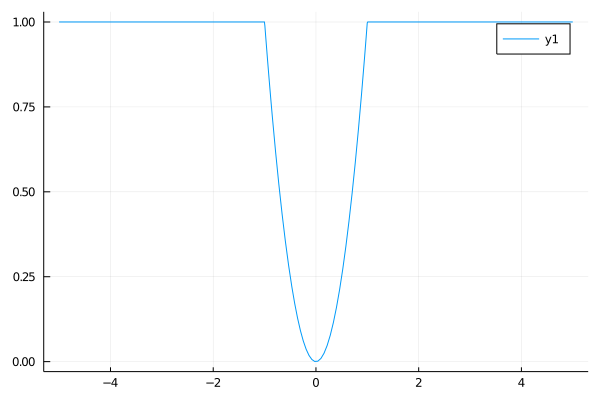

In [34]:
mynl(x) = min(1.0, max(0.0, x^2))
plot(mynl)

In [35]:
m = Chain(Dense(1,50,mynl), Dense(50,50,mynl), Dense(50,1))

Chain(Dense(1, 50, mynl), Dense(50, 50, mynl), Dense(50, 1))

In [36]:
@which Dense(50,50, σ)

(::Type{Dense})(in::Integer, out::Integer, σ; initW, initb) in Flux at /home/zach/.julia/packages/Flux/goUGu/src/layers/basic.jl:114

In [37]:
using Zygote

In [38]:
f(x) = 5x+3

f (generic function with 1 method)

In [39]:
f'(10)

5

In [40]:
@code_llvm f'(1)


;  @ /home/zach/.julia/packages/Zygote/KpME9/src/compiler/interface.jl:52 within `#43'
define i64 @"julia_#43_8180"(i64) {
top:
  ret i64 5
}


In [41]:
function g(x)
    y = zero(x)
    for i in 1:10
        y += x
    end
    return y
end

g (generic function with 1 method)

In [42]:
g'(5)

10

In [43]:
using BenchmarkTools
@benchmark g'(5)

BenchmarkTools.Trial: 
  memory estimate:  3.84 KiB
  allocs estimate:  88
  --------------
  minimum time:     6.905 μs (0.00% GC)
  median time:      8.071 μs (0.00% GC)
  mean time:        8.941 μs (6.71% GC)
  maximum time:     3.064 ms (99.44% GC)
  --------------
  samples:          10000
  evals/sample:     4

In [44]:
@benchmark g(5)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     2.118 ns (0.00% GC)
  median time:      2.288 ns (0.00% GC)
  mean time:        2.464 ns (0.00% GC)
  maximum time:     53.000 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1000

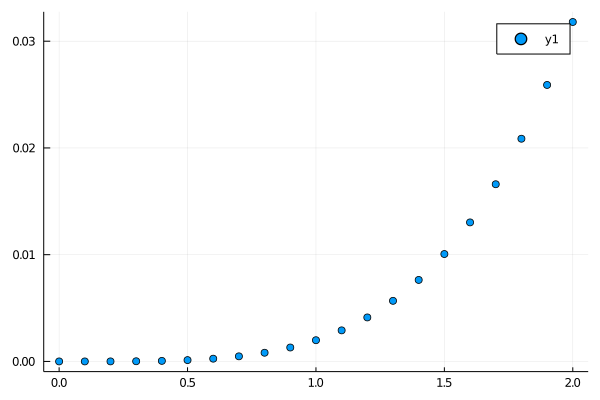

In [45]:
scatter(0.0:0.1:2.0, [first(y) for y in m.([x] for x in 0.0:0.1:2.0)])


In [34]:
n = 100
dx = LinRange(0, 1, n)[randperm(n)]
dy = sin.(4*pi*dx);

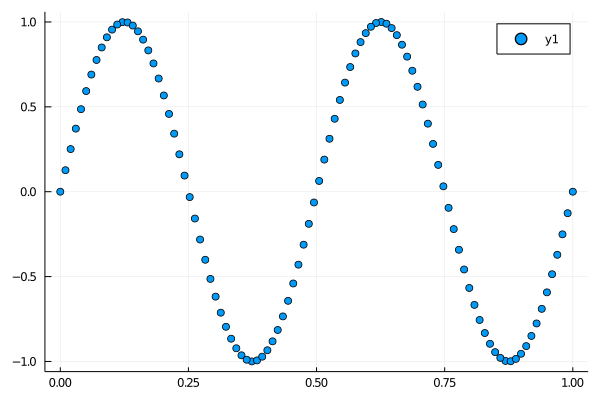

In [35]:
scatter(dx, dy)

In [36]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(Dense(1, 50, σ), Dense(50, 50, σ), Dense(50, 1))

In [37]:
loss(x, y) = sum((m(x)-y).^2)

loss (generic function with 1 method)

In [38]:
ps = Flux.params(m)

Params([Float32[-0.039040454; 0.000579144; … ; 0.2902786; -0.05209311], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.21639293 -0.008162505 … 0.0357269 -0.14679964; 0.13054962 -0.15357485 … -0.026570365 0.24339142; … ; -0.13907596 -0.189997 … 0.18374753 -0.06225633; 0.0679822 0.19270071 … 0.1566814 0.12645149], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.30905566 0.10861608 … 0.027662016 0.09551959], Float32[0.0]])

In [39]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Array{Tuple{SArray{Tuple{1},Float64,1,1},SArray{Tuple{1},Float64,1,1}},1}:
 ([0.5757575757575758], [0.8145759520503361])
 ([0.37373737373737376], [-0.9998741276738751])
 ([0.12121212121212122], [0.998867339183008])
 ([0.0], [0.0])
 ([0.47474747474747475], [-0.31203344569848707])
 ([0.050505050505050504], [0.5929079290546404])
 ([0.3838383838383838], [-0.9938384644612541])
 ([0.7676767676767676], [-0.22031053278654034])
 ([0.7575757575757576], [-0.09505604330418282])
 ([0.5454545454545454], [0.5406408174555971])
 ([0.7070707070707071], [0.5136773915734072])
 ([0.98989898989899], [-0.1265924535737493])
 ([0.10101010101010101], [0.9549022414440739])
 ⋮
 ([0.3939393939393939], [-0.9718115683235419])
 ([0.1111111111111111], [0.984807753012208])
 ([0.898989898989899], [-0.9549022414440742])
 ([0.9494949494949495], [-0.5929079290546404])
 ([0.0707070707070707], [0.7761464642917568])
 ([0.26262626262626265], [-0.15800139597335008])
 ([0.29292929292929293], [-0.5136773915734061])
 (

900

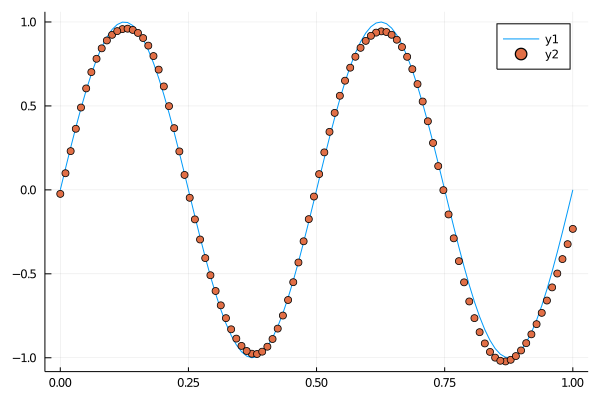

LoadError: [91mInterruptException:[39m

In [41]:
for i in 1:1000
    Flux.train!(loss, ps, data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)))
        scatter!(p, dx, [first(y) for y in m.(d[1] for d in data)])
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end